##  Polynomial Regression과 오버피팅/언더피팅 이해

**단항 회귀** 

- 독립변수(feature)와 종속변수(target)의 관계가 일차 방정식 형태

**다중선형회귀**

$ y = w_0 + w_1 X_{1} + w_2 X_{2} + w_3 X_{3} + ... + w_n X_{n} $
- 독립변수(festure)와 종속변수(target)의 관계가 일차방정식으로 표현된 회귀
- 직선으로 표현

**다항 회귀  (Polynomial Regression)** 

**다항회귀**

$ y = w_0 + w_1 X_{1} + w_2 X_{2} + w_3 X_{1}X_{2} + w_4 X_{1}^2 + w_5 X_{2}^2 $

- 회귀가 독립변수의 일차식이 아닌 2차식, 3차식 등 다항식으로 표현되는 회귀식
- 선형회귀임

$ z=[X_{1} , X_{2} , X_{1}X_{2} , X_{1}^2, X_{2}^2 ] $라고 하면

$ y = w_0 + w_1 Z_{1} + w_2 Z_{2} + w_3 Z_{3} + w_4 Z_{4} + w_5 Z_{5} $

- 피처 X에 대해 타겟 Y 값의 관계를 단순 선형 회귀 직선형으로 표현한 것보다
    - 다항 회귀 곡선형으로 표현한 것이 더 예측 성능이 높음

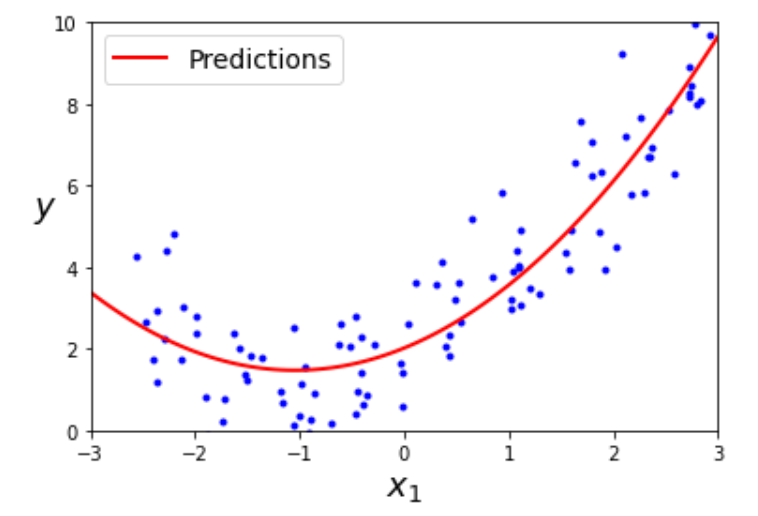

**사이킷런은 다항회귀를 위한 클래스를 명시적으로 제공하지 않음**

- 다항 회귀가 선형 회귀이므로 PolynomalFeatures 클래스를 통해 독립변수(피처)를 다항식 피처로 변환

#### 관련 함수

PolynomialFeatures(degree=차수)

fit_transform(피처) 


*PolynomialFeatures 클래스를 통해 피처를 다항식 피처로 변환 *  


PolynomialFeatures(degree=차수)  
PolynomialFeatures(degree=2) : 2차 다항식 

fit_transform(피처) 또는   
fit() / transform() 메소드를 사용해서 변환 작업 수행

***PolynomialFeatures 클래스로 다항식 변환***  
- 단항값을 2차 다항값으로 변환하는 예

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

#그래프 패키지 
import matplotlib.pyplot as plt 
%matplotlib inline 
# 한글 문제 해결
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')# 한글 문제 해결
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')


# # 동시 출력
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity="all"

In [2]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

X = np.array([2,3])
X = X.reshape(-1,1)

## 2차 다항으로 변경
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)

# 결과
print(X)
print('변환된 2차 다항식 계수 feature:\n', poly_ftr) # (1,X,X^2)

[[2]
 [3]]
변환된 2차 다항식 계수 feature:
 [[1. 2. 4.]
 [1. 3. 9.]]


In [3]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
np.random.seed(4)

X = np.arange(6).reshape(3,2)
print(X)

[[0 1]
 [2 3]
 [4 5]]


$y = 0X_1 + 1X_2$  
$y = 2X_1 + 3X_2$    
$y = 4X_1 + 5X_2$

In [4]:
## 2차 다항으로 변경
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)

print('변환된 2차 다항식 계수 feature:\n', poly_ftr)
# transform from (x1, x2) to (1, x1, x2, x1^2, x1*x2, x2^2)

변환된 2차 다항식 계수 feature:
 [[ 1.  0.  1.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.]
 [ 1.  4.  5. 16. 20. 25.]]


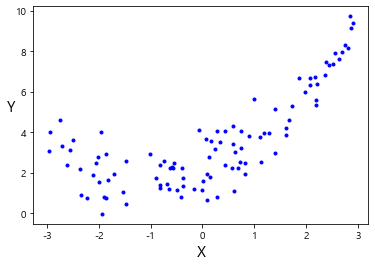

In [5]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(4)
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)  # 약간의 노이즈 포함
# len(X) : 100
# len(y) : 100
plt.plot(X, y, "b.")
plt.ylabel("Y", fontsize=15, rotation=0)
plt.xlabel("X", fontsize=15)
plt.show()

**그래프 결과** 
- 데이터의 분포가 곡선 형태로 나타남 : 비선형
- 일반적인 선형회귀로 해결할 수 없다

In [6]:
from sklearn.preprocessing import PolynomialFeatures

# poly_features = PolynomialFeatures(degree=2) #include_bias=True 편향을 위한 1값을 생성
poly_features = PolynomialFeatures(degree=2,include_bias=False) #include_bias=False 편향을 위한 1값을 생성하지 않는다
X_poly = poly_features.fit_transform(X)

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y) # 생성된 다항 피처를 이용해서 학습

lin_reg.coef_, lin_reg.intercept_ 

(array([[0.96894841, 0.47364037]]), array([2.11880983]))

$y = 0.9689484X_1 + 0.47364037X_1^2 +2.11880983 $ : 회귀식

In [8]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1) # test데이터
X_new_poly = poly_features.transform(X_new) #test 데이터도 다항식으로 변환

y_new = lin_reg.predict(X_new_poly)

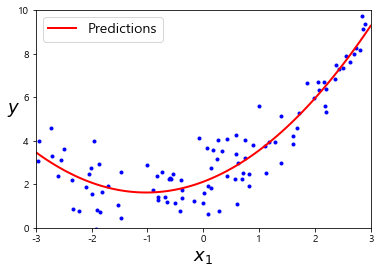

In [9]:
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

# $ : matplotlib 수학적 표현
# a^1 : 위첨자
# a_1 : 아래첨자

#### ** 다항 회귀를 이용한 보스턴 주택가격 예측 **

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.datasets import load_boston

In [11]:
boston = load_boston()

# boston 데이타셋 DataFrame 변환 
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)
bostonDF

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [12]:
# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함. 
bostonDF['PRICE'] = boston.target
print('Boston 데이타셋 크기 :', bostonDF.shape)

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)


X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)

Boston 데이타셋 크기 : (506, 14)


Pipeline을 이용하여 PolynomialFeatures 변환과 LinearRegression 적용을 순차적으로 결합 (3가지)  
(1) degree=2  
(2) degree=2, include_bias=False  
(3) degree=3, include_bias=False  

In [13]:
#(1) degree=2
# - 파이프라인 작업 구성
# Pipeline([('작업명',작업1), ('작업명',작업2),....('작업명',작업n)])
p_model = Pipeline([('poly',PolynomialFeatures(degree=2)),
                    ('linear',LinearRegression())])

# pipeline에 data를 전달 해서 학습
p_model.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures()), ('linear', LinearRegression())])

In [14]:
# linear스텝의 속성 coef_를 반환
print('Polynomial 회귀 계수\n', np.round(p_model.named_steps['linear'].coef_, 2))


Polynomial 회귀 계수
 [-1.09063739e+09 -8.13000000e+00 -9.00000000e-02 -7.01000000e+00
  3.69700000e+01  2.53630000e+02  3.09600000e+01  1.25000000e+00
 -1.20200000e+01  3.09000000e+00 -1.30000000e-01  7.76000000e+00
  5.00000000e-02  5.10000000e-01 -0.00000000e+00  2.70000000e-01
  6.00000000e-01  1.86000000e+00 -1.40000000e-01 -0.00000000e+00
  1.00000000e-02 -1.00000000e-01  5.90000000e-01 -6.00000000e-02
  9.60000000e-01 -0.00000000e+00  4.00000000e-02 -0.00000000e+00
 -3.00000000e-02 -2.10000000e-01 -2.11000000e+00 -7.00000000e-02
  0.00000000e+00 -3.00000000e-02  1.00000000e-02  0.00000000e+00
 -2.00000000e-02  1.00000000e-02 -1.00000000e-02  4.00000000e-02
 -5.30000000e-01 -7.00000000e-02  1.90000000e-01  1.00000000e-02
  1.80000000e-01 -4.00000000e-02  0.00000000e+00 -7.00000000e-02
  1.00000000e-02 -2.00000000e-02  3.69700000e+01 -2.92400000e+01
 -5.98000000e+00 -3.00000000e-02  1.74000000e+00  3.00000000e-02
  3.00000000e-02 -1.99000000e+00  3.00000000e-02 -1.70000000e-01
 -7.701

In [15]:
### 학습된 회귀식을 이용해 예측/평가
y_preds = p_model.predict(X_test)

# 평가
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)


print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 41.731 , RMSE : 6.460
Variance score : 0.414


In [16]:
#(2) degree=2, include_bias 튜닝
# - 파이프라인 작업 구성
# Pipeline([('작업명',작업1), ('작업명',작업2),....('작업명',작업n)])
p_model = Pipeline([('poly',PolynomialFeatures(degree=2,include_bias=False)),
                    ('linear',LinearRegression())])

# pipeline에 data를 전달 해서 학습
p_model.fit(X_train, y_train)

y_preds = p_model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)


print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 15.556 , RMSE : 3.944
Variance score : 0.782


## degree=2, include_bias 튜닝 결과
- MSE : 15.556 , RMSE : 3.944
- Variance score : 0.782

- 전반적으로 수치 좋아짐(include_bias 튜닝하기 전보다)

In [17]:
## 3차 다항식으로 변경
# degree=3, include_bias=False

p_model = Pipeline([('poly', PolynomialFeatures(degree=3, include_bias=False)),
                  ('linear', LinearRegression())])

p_model.fit(X_train, y_train)
y_preds = p_model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 79625.593 , RMSE : 282.180
Variance score : -1116.598


## MSE, RMSE가 급격히 늘어나면서 오버피팅이 일어남
- MSE : 79625.593 , RMSE : 282.180
- Variance score : -1116.598

#### 다항회귀의 단점 : 오버피팅이 일어나기 쉽다

In [18]:
X_train_poly= PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_train, y_train)
X_train_poly.shape, X_train.shape

((354, 104), (354, 13))

In [19]:
X_train_poly= PolynomialFeatures(degree=3, include_bias=False).fit_transform(X_train, y_train)
X_train_poly.shape, X_train.shape

((354, 559), (354, 13))

#### 다항식 값이 높아질수록 오버피팅을 급격하게 진행하고 오차도 늘어나게 됨
- 다항식을 쓸때는 degree에 대해 주의 해야 함

다항 회귀를 이용한 과소적합 및 과적합 이해   


- 다항 회귀는 피처의 직선적 관계가 아닌 복잡한 다항 관계를 모델할 수 있지만
- 다항 회귀의 차수를 높일수록 학습 데이터에만 너무 맞춰진 학습이 이루어져 과적합 문제 발생

**다항 회귀 차수를 변화시키면서 예측 곡선과 예측 정확도 비교 예제**  

- 원본 데이터 : 피처 X와 타겟 y가 노이즈가 포함된 다항식의 코사인 그래프 관계  
    - (cosine 곡선에 약간의 Noise 변동값을 더하여 실제값 곡선을 만듬)

**학습 데이터**
-  X : 30개의 임의 데이터. 피처
-  y : X의 코사인 값에서 약간의 노이즈 변동 값을 더한 타겟 값

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline


In [21]:
# random 값으로 구성된 X갑에 대해 Cosine 변환값을 반환
def true_fun(X) :
    return np.cos(1.5 * np.pi * X)

In [22]:
# X는 0부터 1까지 30개의 random값으로 생성하고 순차적으로 나열
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))


In [23]:
# y 값은 cosine 기반의 true_fun() 에서 약간의 Noise 변동값을 더한 값입니다. 
y = true_fun(X) + np.random.randn(n_samples) * 0.1

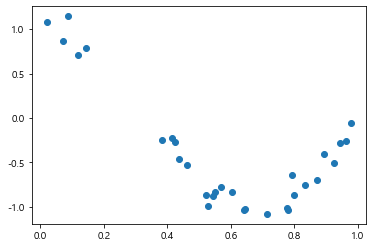

In [24]:
# 그래프 표시
plt.scatter(X,y)


Degree 1 회귀 계수는 [-2.] 입니다.
Degree 1 MSE 는 0.41 입니다.

Degree 4 회귀 계수는 [  0. -18.  24.  -7.] 입니다.
Degree 4 MSE 는 0.04 입니다.

Degree 15 회귀 계수는 [-2.98300000e+03  1.03900000e+05 -1.87417100e+06  2.03717220e+07
 -1.44873987e+08  7.09318780e+08 -2.47066977e+09  6.24564048e+09
 -1.15677067e+10  1.56895696e+10 -1.54006776e+10  1.06457788e+10
 -4.91379977e+09  1.35920330e+09 -1.70381654e+08] 입니다.
Degree 15 MSE 는 182815433.48 입니다.


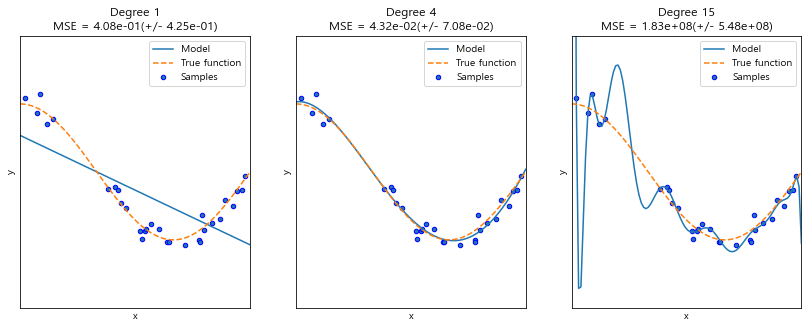

In [25]:
plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교합니다. 
for i in range(len(degrees)):   
   
    # 개별 degree별로 Polynomial 변환합니다. 
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)
    
    # 교차 검증으로 다항 회귀를 평가합니다. 
    # 학습 데이터를 10개의 교차 검증 세트로 나누어 측정해서 평균 (cv=10)
    scores = cross_val_score(pipeline, X.reshape(-1,1), y,scoring="neg_mean_squared_error", cv=10)
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients),2))
    print('Degree {0} MSE 는 {1:.2f} 입니다.'.format(degrees[i] , -1*np.mean(scores)))
    
    # 그래프로 표시
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=()) # setp() : 프로퍼티 설정
    
    # 0 부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다. 
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.  
    X_test = np.linspace(0, 1, 100)
    # 예측값 곡선 : 다항 회귀 예측 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model") 
    # 실제 값 곡선 : 실제 데이터 세트 X, y의 코사인 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    # 학습 데이터 
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    
    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))  


**Underfitting에 대한 대응**
- 학습 시간을 늘린다 (Deep Learning이나 Auto-parameter Tuning 경우)
- 더 복잡한 모델을 구성한다
- 모델에 추가 Feature를 도입한다
- Regularization을 사용하지 않거나 영향을 줄인다
- 모델을 다시 구축한다

**Overfitting에 대한 대응**
- 학습을 더 일찍 멈추게 한다
- 데이터를 추가한다
- 모델의 복잡도를 낮춘다
- 일부 Feature를 제거한다
- Regularization을 활용한다
- 앙상블 모델을 적용한다

### 회귀의 가장 큰 목표 (ML 회귀)

- 편향과 분산이 서로 트레이드오프(적절한 편항과 분산점을 찾음)를 이루면서
- 오류 cost 값이 최대치로 낮아지는 모델을 구축하는 것

## 규제 선형 모델 - 릿지, 라쏘, 엘라스틱넷  
Regularized Linear Models – Ridge, Lasso

앞의 다항 회귀 예제
- degree 1 : 지나치게 곡선 단순화함으로써 데이터에 적합하지 않은 과소적합 모델 생성
- degree 15 : 지나치게 모든 데이터에 적합한(과적합) 회귀식으로 다항식 복잡하고, 회귀 계수가 매우 크게 설정
- 평가 데이터 세트에 대해 형편없는 예측 성능 보임
- 결론 : 회귀 모델은 적절히 데이터에 적합하면서도 
    - **회귀 계수가 기하급수적으로 커지는 것을 제어** 할 수 있어야 함

**선형 모델의 RSS 최소화하는 비용함수의 한계점**  (예측값과 실제값의 손실함수(RSS))


- 실제값과 예측값 차이를 최소화하는 것만 고려함에 따라
- 학습 데이터에 지나치게 맞추게 되고 회귀계수가 쉽게 커짐
- 이러한 경우 변동성이 심해져서 테스트 데이터세트에서 예측성능이 저하되기 쉬움  

- 학습 데이터의 잔차 오류 값을 최소로 하는 RSS 최소화와 과적합을 방지하기 위해 회귀계수값이 커지지 않도록 하는 방법이 서로 균형을 이뤄야 함

- 회귀 계수의 크기를 제어해 과적합을 개선하려면 비용(cost) 함수의 목표는
    - $ RSS(W) + alpha*||W||_2^2$ 를 최소화하는 것으로 변경해야 함
    - tip. ||W|| => Norm은 벡터의 길이 혹은 크기를 측정하는 방법(함수)
        - Norm이 측정한 벡터의 크기는 원점에서 벡터 좌표까지의 거리임
        - 옆의 수치는 차원을 의미함. 즉 $||W||_2^2$ 는 2차원 노름

#### 비용 함수 목표 수식 P320 
$ 비용함수목표 = Min(RSS(W) + alpha*||W||_2^2 )$

- $alpha$=0인 경우 : $W$가 커도 $alpha*||W||_2^2$가 0이 되어 비용함수는 $Min(RSS(W))$

- $alpha$=무한대인 경우 : $alpha*||W||_2^2$가 무한대가 되어 너무 커지므로 비용함수는 $W$를 0에 가깝게 최소화해야 함 

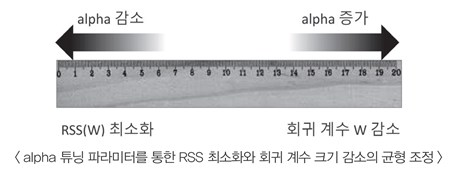

#### 결론 :  alpha가 커지면 W가 작아져야 Min()을 찾을 수 있음
-  이렇게 비용 함수에 alpha값을 통해서 패널티를 부여해 회귀 계수의 값 크기를 감소시키면서 과적합을 개선해 나가는 방식을 규제(Regularization)라고 함

* alpha : 학습 데이터 적합 정도와 회귀 계수 값의 크기를 제어하는 튜닝 파라미터  
* W : 회기 계수

## 규제
- 비용 함수에 alpha 값으로 패널티를 부여해서 
- 회귀 계수 값의 크기를 감소시켜 과적합을 개선하는 방식
- L2 방식과 L1 방식으로 구분

### L2 규제 - Ridge

- L2 Norm Reqularization
- 과적합을 피하고 일반화 성능을 강화하는 방법
- **W의 제곱에 대해 페널티**를 부여하는 방식

#### 릿지 회귀의 특징
- 변수간 상관관계가 높은 상황에서 좋은 예측 성능  
- 회귀 계수의 크기가 큰 변수를 우선적으로 줄이는 경향이 있음
- 변수 선택 기능은 없음 (회귀 계수를 아무리 줄여도 0이 되지는 않는다)

### 사이킷런에서 릿지회귀 클래스 `Ridge`

from sklearn.linear_model import Ridge

Ridge(alpha=1.0, * , fit_intercept=True, normalize=False, copy_X=True, max_iter=None, tol=0.001, solver='auto', random_state=None)

#### Ridge 클래스 이용 보스턴 주택 가격 예측/평가

In [26]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [27]:
# boston 데이터셋 로드
boston = load_boston()

# boston 데이타셋 DataFrame 변환 
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)

# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함. 
bostonDF['PRICE'] = boston.target
print('Boston 데이타셋 크기 :',bostonDF.shape)

y_target = bostonDF['PRICE']  # 타겟 데이터
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False) # 피처 데이터

Boston 데이타셋 크기 : (506, 14)


In [28]:
ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error",cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores )
avg_rmse = np.mean(rmse_scores)

In [29]:
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-11.422 -24.294 -28.144 -74.599 -28.517]
 5 folds 의 개별 RMSE scores :  [3.38  4.929 5.305 8.637 5.34 ]
 5 folds 의 평균 RMSE : 5.518 


####  결과
-  5 folds 의 평균 RMSE : 5.518 
- 앞에서 규제를 적용하지 않은 LinearRegression인 경우에 비해
    - 규제 적용하지 않은 학습 결과   
         - 5 folds 의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
         - 5 folds 의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
         - 5 folds 의 평균 RMSE : 5.829 
         
- 수치 감소됨 (5.829  -> 5.518)

### alpha값을 0 , 0.1 , 1 , 10 , 100 으로 변경하면서 
**RMSE와 회귀 계수 값의 변화 측정**
- 릿지 회귀는 alpha 값이 커질수록
    - 회귀 계수 값을 작게 만듦

In [30]:
# alpha 파라미터 값 정의
alphas = [0,0.1,1.,10,100]

for alpha in alphas :
    ridge = Ridge(alpha = alpha)

    #cross_val_score를 이용하여 5 fold의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f} '.format(alpha,avg_rmse))
    

alpha 0 일 때 5 folds 의 평균 RMSE : 5.829 
alpha 0.1 일 때 5 folds 의 평균 RMSE : 5.788 
alpha 1.0 일 때 5 folds 의 평균 RMSE : 5.653 
alpha 10 일 때 5 folds 의 평균 RMSE : 5.518 
alpha 100 일 때 5 folds 의 평균 RMSE : 5.330 


### 결과
- alpha값이 커질 수록 RMSE값이 줄어들었음 : 성능이 좋아짐
- alpha 0일때 5.829는 규제를 적용하지 않은 회귀와 동일

### 각 alpha에 따른 회귀 계수 값을 시각화  

- alpha의 변화에 따른 피처의 회귀 계수 값을 가로 막대 그래프로 시각화

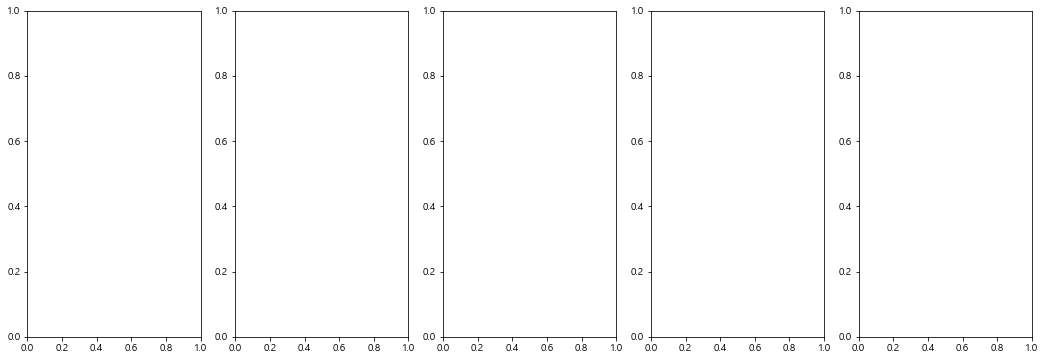

In [31]:
# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성  
fig , axs = plt.subplots(figsize=(18,6) , nrows=1 , ncols=5)

In [32]:
# 각 alpha에 따른 회귀계수 값을 데이터로 저장하기 위한 df 생성
coeff_df = pd.DataFrame()

In [33]:
alphas

[0, 0.1, 1.0, 10, 100]

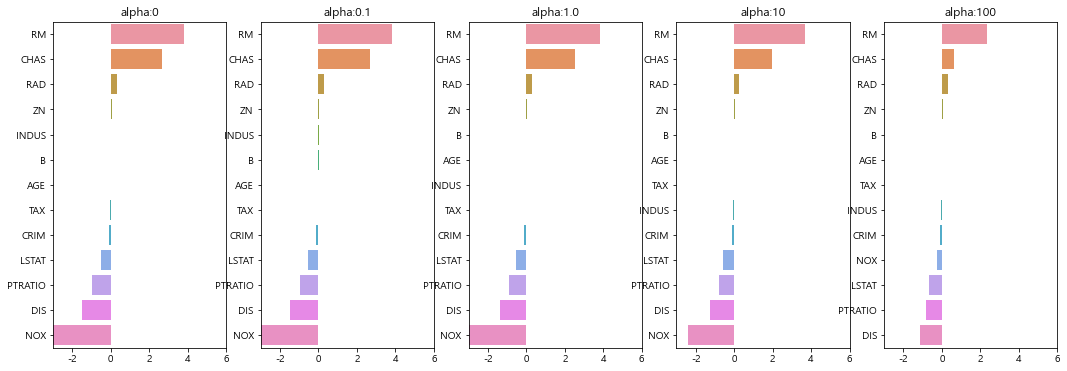

In [34]:
fig , axs = plt.subplots(figsize=(18,6) , nrows=1 , ncols=5)

for pos, alpha in enumerate(alphas) :
    ridge = Ridge(alpha=alpha) # 초기화
    ridge.fit(X_data, y_target) #학습
    
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 df의 컬럼으로 추가
    coeff = pd.Series(data=ridge.coef_, index = X_data.columns)
    colname = 'alpha:'+ str(alpha)
    coeff_df[colname] = coeff
    
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 
    # 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values , y=coeff.index, ax=axs[pos])
plt.show()

### 결과
- alpha값을 계속 증가시킬수록 회귀 계수의 값은 지속적으로 작아짐
- 특히 **NOX** 피처의 경우 alpha 값이 증가함에 따라 회귀 계수가 크게 작아짐(영향이 줄어들게 됨)

- 그러나 릿지 회귀의 경우에는 **회귀 계수를 0으로 만들지는 않음**

In [35]:
# alpha값에 따른 컬럼별 회귀 계수 출력
coeff_df

,alpha:0,alpha:0.1,alpha:1.0,alpha:10,alpha:100
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
NOX,-17.766611,-16.684645,-10.777015,-2.371619,-0.262847
RM,3.809865,3.818233,3.854000,3.702272,2.334536
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
DIS,-1.475567,-1.459626,-1.372654,-1.248808,-1.153390
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856


In [36]:
ridge_alphas = [0 , 0.1 , 1 , 10 , 100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1.0,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


### 라쏘 회귀  

- L1 Norm Reqularization
- **W(회귀 계수)의 절대값에 패널티**를 부여하는 L1규제를 선형 회귀에 적용한 것
- 영향력이 크지 않은 회귀 계수를 0으로 변환하고 제거
- 적절한 피처만 회귀에 포함시키는 피처 선택의 특성


### 라쏘 회귀 예제 
- 라쏘의 alpha 값을 변화시키면서 RMSE와 각 피처의 회귀 계수 출력

In [37]:
from sklearn.linear_model import Lasso, ElasticNet

# 뒤에 ElasticNet에서도 사용할 수 있도록 함수로 작성
# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고
# 회귀 계수값들을 DataFrame으로 반환하는 함수 생성

def get_linear_reg_eval(model_name,params=None,X_data_n=None,y_target_n=None,verbose=True) :
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######') # Log 출력
    print(params)    
    for param in params : # alpha값 변화
        # 모델별 해당 클래스 객체 생성
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
            
        # 교차 검증 수행
        neg_mse_scores = cross_val_score(model, X_data_n, 
                                             y_target_n, scoring="neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        model.fit(X_data, y_target_n)
        
        # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가. 
        coeff = pd.Series(data=model.coef_ , index=X_data.columns )
        colname='alpha:'+str(param)
        coeff_df[colname] = coeff
        
    return coeff_df
        

#### 라쏘 모델 기반으로 alpha값 변화에 따른 rmse값과 그때의 회귀계수 출력

In [38]:
lasso_alphas = [0.02, 0.07, 0.1, 0.5, 1, 3,100]
coeff_lasso_df = get_linear_reg_eval('Lasso',params=lasso_alphas,
                                     X_data_n=X_data, y_target_n=y_target)

#######  Lasso #######
[0.02, 0.07, 0.1, 0.5, 1, 3, 100]
alpha 0.02일 때 5 폴드 세트의 평균 RMSE: 5.679 
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.612 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.615 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.669 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.776 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.189 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 8.393 


### 결과
- 라쏘 : alpha 0.07일때 가장 좋은 평균 RMSE 5.612가 나타남
- 앞의 예제에서 확인한 릿지 : RMSE 5.518 - alpha가 100일때 RMSE 가 5.330

- **현 데이터에 대해서는 Lasso가 Ridge보다 약간 떨어지는 수치**
    - 일반 선형회귀보다는 향상

In [39]:
# alpha 값에 따른 피처별 회귀 계수
# 반환된 coeff_lasso_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+ str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.02,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3,alpha:100
RM,3.820592,3.789725,3.703202,2.498212,0.949811,0.000000,0.000000
CHAS,2.316725,1.434343,0.955190,0.000000,0.000000,0.000000,0.000000
RAD,0.292030,0.270936,0.274707,0.277451,0.264206,0.061864,-0.000000
ZN,0.047382,0.049059,0.049211,0.049544,0.049165,0.037231,0.000000
B,0.009664,0.010248,0.010249,0.009469,0.008247,0.006510,0.004466
INDUS,-0.004214,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000,-0.000000
AGE,-0.004329,-0.011706,-0.010037,0.003604,0.020910,0.042495,-0.000000
TAX,-0.013011,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602,-0.020972
CRIM,-0.104380,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000,-0.000000
LSTAT,-0.536422,-0.560431,-0.568769,-0.656290,-0.761115,-0.807679,-0.000000


### 엘라스틱넷 회귀 

**피처갯수가 많은 데이터에 주로 적용시킨다**  
엘라스틱넷 (Elastic Net)
- 급격한 회귀 계수 변동을 완화하기 위해 L2 규제를 라쏘 회귀에 추가한 것
- 단점 : L1과 L2를 결합한 규제로 수행시간이 상대적으로 오래 걸린다는 것
- 사이킷런의 ElasticNet 클래스 사용
- 주요 파라미터 : alpha와 l1_ratio
- ElasticNet 클래스의 alpha는 Lidge와 Lasso 클래스의 alpha 값과 다름 


- 엘라스틱 규제 : a*L1 + b*L2
- a : L1 규제의 alpha 값
- b : L2 규제의 alpha 값
- ElasticNet 클래스의 alpha : a + b  
    

- l1_ratio = a / (a + b)
- l1_ratio가 0이면 a가 0이되어 L2규제와 동일
- l1_ratio가 1이면 b가 0이되어 L1규제와 동일

### 엘라스틱 넷 예제

- alpha값을 변화시키면서 RMSE와 회귀계수를 출력

In [40]:
elastic_alphas = [ 0.07, 0.1, 0.5, 1, 3, 100]
coeff_elastic_df =get_linear_reg_eval('ElasticNet', params=elastic_alphas,
                                      X_data_n=X_data, y_target_n=y_target)

#######  ElasticNet #######
[0.07, 0.1, 0.5, 1, 3, 100]
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.542 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.526 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.467 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.597 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.068 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 8.344 


### 결과
- alpha 0.5일 때 RMSE 5.467로 가장 좋은 예측 성능 보임

- 엘라스틱넷 : alpha 0.5일 때 RMSE 5.467

- 라쏘 : alpha가 0.07일 때 가장 좋은 평균 RMSE 5.618 나타냄

- 앞의 릿지의 5개 폴드 세트 평균 RMSE 5.518,
    - alpha가 100일 때 평균 RMSE 5.330

- LinearRegression 5개 폴드 평균 RMSE 5.829

In [41]:
# alpha 값에 따른 피처별 회귀 계수
# 반환된 coeff_elastic_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3,alpha:100
RM,3.574162,3.414154,1.918419,0.938789,0.000000,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846,0.000000
ZN,0.050107,0.050617,0.052878,0.052136,0.038268,0.000000
B,0.010122,0.010067,0.009114,0.008320,0.007020,0.007863
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446,-0.000000
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417,-0.021195
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058,-0.000000
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000


### 결과
- alpha 값에 따른 피처들의 회귀 계수들 값이
- 라쏘보다는 상대적으로 0이 되는 값이 적음을 알 수 있음

### 규제 선형 회귀의 가장 대표적인 기법 릿지, 라쏘, 엘라스틱넷 회귀 결론    

- 어떤 것이 가장 좋은지는 상황에 따라 다름
- 각 알고리즘에서 하이퍼 파라미터를 변경해 가면서 
- 최적의 예측 성능을 찾아내야 함
- 그러나, 선형 회귀의 경우 최적의 하이퍼 파라미터를 찾아내는 것 못지않게
- 먼저 데이터 분포도의 정규화와 인코딩 방법이 매우 중요함

### 선형 회귀 모델을 위한 데이터 변환

선형 회귀 모델을 위한 데이터 변환
- 일반적으로 중요 피처들이나 타깃값의 분포도가 
    - **심하게 왜곡됐을 경우**에 스케일링/정규화 등의 변환 작업을 반드시 수행해야 함
    
- 특히 타겟값의 경우 특정 값의 분포가 치우친 왜곡된 형태일 경우
    - 예측 성능값에 부정적인 영향을 미침

스케일링/정규화 작업 수행 방법
- 일반적으로 피처 데이터 세트와 타깃 데이터 세트 다른 방법 적용

(1) 사이킷런을 이용해 피처 데이터 세트에 적용하는 변환 작업  
방법1 : 스케일링/정규화 수행
- StandardScaler 클래스 이용해서 평균이 0 분산이 1인 표준 정규 분포를 가진 데이터 세트로 변환
- 또는 MinMaxScaler 클래스를 이용해 최소값이 0이고, 최대값이 1인 값으로 정규화 수행

방법 2: 스케일링/정규화를 수행한 데이터 세트에 다시 다항 특성을 적용하여 변환하는 방법
- 보통 (1)번 방법을 통해 예측 성능에 향상이 없을 경우 적용

방법3 : 로그 변환 (Log Transfromation)
- 원래 값에 log 함수를 적용하면 보다 정규 분포에 가까운 형태로 값이 분포됨
- 매우 유용한 변환으로, 실제 선형 회귀에서 훨씬 많이 사용
- 많이 사용하는 이유
  - 방법1의 경우 예측 성능 향상을 크게 기대하기 어려운 경우가 많고
  - 방법2의 경우 피처 수가 매우 많을 경우에는 
  - 다항 변환으로 생성되는 피처 수가 기하급수로 늘어나서
  - 과적합이 발생할 수 있기 때문
  
### 타깃값의 경우 : 로그변환 적용이 일반적임
- 예측 성능이 향상된 경우가 많은 사례에서 검증이 되었고
- 결정값을 다른 변환 하게되면 원본값으로 되돌리기가 어려울 수 있기 때문에
- **일반적으로 로그변환을 적용**


선형 회귀 모델을 위한 데이터 변환 예
- 보스턴 주택가격 피처 데이터 세트에
- 표준 정규 분포 변환, 최대값/최소값 정규화, 로그 변환 차례로 적용 후
- RMSE로 각 경우별 예측 성능 측정
- 로그 변환에서 np.log() 적용하면 언더플로우가 발생하기 쉬워서
- 1+log() 함수를 구현한 np.log1p() 함수 이용

(506,)


(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <BarContainer object of 10 artists>)

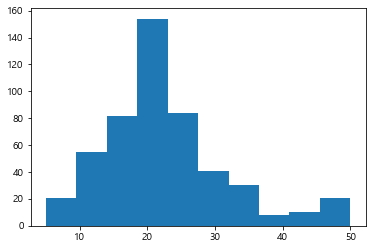

In [42]:
print(y_target.shape)
plt.hist(y_target, bins=10)

In [43]:
# 데이터 변환 함수 생성
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

# method는 표준 정규 분포 변환(Standard), 최대값/최소값 정규화(MinMax), 로그변환(Log) 결정
# p_degree는 다향식 특성을 추가할 때 적용. p_degree는 2이상 부여하지 않음. 
def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data

    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree, 
                                         include_bias=False).fit_transform(scaled_data)
    
    return scaled_data

Ridge 클래스의 alpha 값을 변화시키면서  
피처 데이터 세트를 여러 가지 방법으로 변환한 데이터 세트를 입력 받을 경우에  
RMSE 값이 어떻게 변하는지 확인  


피처 데이터 변환 방법 6개  
(1) 변환 없는 원본 데이터   
(2) 표준 정규 분포  
(3) 표준 정규 분포를 다시 2차 다항식 변환  
(4) 최소값/최대값 정규화  
(5) 최소값/최대값 정규화를 다시 2차 다항식 변환  
(6) 로그 변환

In [44]:
alphas = [0.1, 1,10,100]

scale_methods=[(None, None), ('Standard', None), ('Standard', 2), 
               ('MinMax', None), ('MinMax', 2), ('Log', None)]

In [45]:
def get_linear_reg_eval(model_name,params=None,X_data_n=None,y_target_n=None,verbose=True) :
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######') # Log 출력
    print(params)    
    for param in params : # alpha값 변화
        # 모델별 해당 클래스 객체 생성
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
            
        # 교차 검증 수행
        neg_mse_scores = cross_val_score(model, X_data_n, 
                                             y_target_n, scoring="neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        model.fit(X_data, y_target_n)
        
        # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.
        coeff = pd.Series(data=model.coef_ , index=X_data.columns )
        colname='alpha:'+str(param)
        coeff_df[colname] = coeff

        return coeff_df


In [46]:
#get_scaled_data() - 데이터변환 함수
#get_linear_reg_eval() - 모델 생성/예측-평가/회귀계수 df로 반환

for scale_method in scale_methods :
    X_data_scaled = get_scaled_data(method=scale_method[0],
                                    p_degree=scale_method[1],
                                    input_data = X_data)
    print('\n## 변환 유형:{0}, Polynomial Degree:{1}'.format(scale_method[0], scale_method[1])) 
    #모델 적용 후 예측 / 평가
    get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_data_scaled, 
                        y_target_n=y_target, verbose=False)    
    


## 변환 유형:None, Polynomial Degree:None
[0.1, 1, 10, 100]
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.788 

## 변환 유형:Standard, Polynomial Degree:None
[0.1, 1, 10, 100]
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.826 

## 변환 유형:Standard, Polynomial Degree:2
[0.1, 1, 10, 100]
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 8.827 

## 변환 유형:MinMax, Polynomial Degree:None
[0.1, 1, 10, 100]
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.764 

## 변환 유형:MinMax, Polynomial Degree:2
[0.1, 1, 10, 100]
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.298 

## 변환 유형:Log, Polynomial Degree:None
[0.1, 1, 10, 100]
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 4.770 


### 결과

- 로그 변환 : alpha 0.1, 1, 10 경우에 모두 성능 향상
- 표준 정규 분포 + 2차 다항식인 경우 alpha 100일때 성능 향상
- 최소값/최대값 정규화 + 2차 다항식인 경우 alpha 1일 때 성능 향상 - 가장 성능이 높았음

- 표준 정규 분포와 최소값/최대값 정규화 변환은 성능 개선 없음
- 2차 다항식 변환시는 성능 향상
- 하지만 다항식 변환은 **피처의 수가 많을 경우 적용하기 힘들고**
- 데이터 건수가 많아지면 계산에 많은 시간이 소모되어 적용상 한계가 있음 

#### 결론
- 일반적으로 선형 회귀를 적용하려는 데이터 세트에 
- 데이터 값의 분포가 심하게 왜곡되어 있을 경우에
- 로그 변환을 적용하는 것이 좋은 결과를 기대할 수 있다

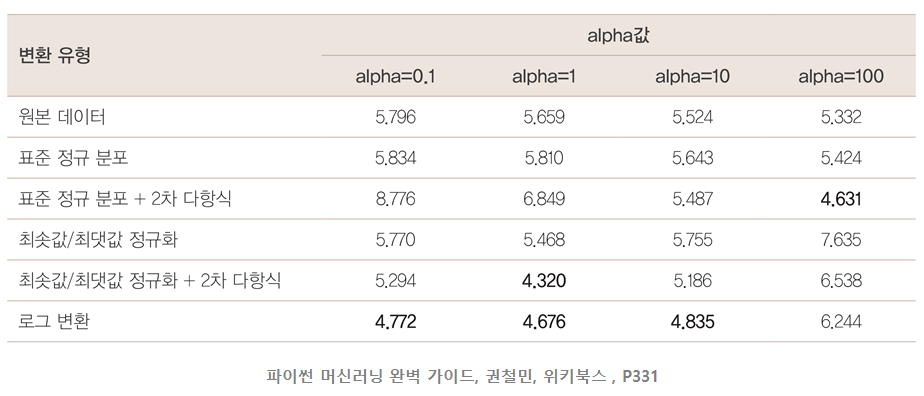